In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
root_dir = "/content/drive/MyDrive/century"

In [66]:
os.listdir(root_dir)

['patients.csv',
 'symptoms.csv',
 'medications.csv',
 'conditions.xlsx',
 'encounters.parquet',
 'patient_gender.csv']

In [67]:
condition = pd.read_excel(root_dir+'/conditions.xlsx')
encounter = pd.read_parquet(root_dir+'/encounters.parquet')
medication = pd.read_csv(root_dir+'/medications.csv')
symptoms = pd.read_csv(root_dir+'/symptoms.csv')
patient = pd.read_csv(root_dir+'/patients.csv')
sex = pd.read_csv(root_dir+'/patient_gender.csv')

In [68]:
def number_unique_value(df,df_name):
  print(f"Data: {df_name}")
  for x in df.columns:
   print(f"The Number of Unique Values for {x} is:{df[x].nunique()}")

def unique_value(df,col,df_name):
  print(f"Data: {df_name}")
  for x in col:
   print(f"The Unique Values for {x} is:{df[x].unique()}")

import matplotlib.pyplot as plt
import numpy as np

def plot_pie_charts(df, cols):
    """
    Creates pie charts side-by-side for multiple columns in a DataFrame.

    Args:
        df: The DataFrame containing the data.
        cols: A list of column names to create pie charts for.
    """

    # Get the number of columns for layout
    ncols = len(cols)

    # Calculate the number of rows needed
    nrows = int(np.ceil(ncols / 3))  # Maximum of 3 pie plots per row

    # Create the figure with adjusted size based on the number of rows
    plt.figure(figsize=(24, 8 * nrows))

    # Iterate through columns and create pie charts
    for i, col in enumerate(cols):
        # Create subplot at specific position (adjust as needed)
        plt.subplot(nrows, min(3, ncols), i + 1)
        value_counts = df[col].value_counts(dropna=False)
        plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Use plt.pie
        plt.title(col)  # Set title for each subplot

    # Adjust layout (optional)
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt

def create_pie_plot(dataframe, column1, column2, title=None):
    """
    Create a pie plot based on the combination of values from two columns in a DataFrame.

    Args:
    - dataframe (pandas.DataFrame): DataFrame containing the data
    - column1 (str): Name of the first column
    - column2 (str): Name of the second column
    - title (str, optional): Title for the plot

    Returns:
    - None
    """
    # Grouping data by the combination of values from column1 and column2
    grouped = dataframe.groupby([column1, column2]).size().reset_index(name='count')

    # Creating a new column combining values from column1 and column2
    grouped["combined"] = grouped[column1] + " " + grouped[column2]

    # Plotting the pie chart
    plt.figure(figsize=(12, 12))
    wedges, labels, autopct = plt.pie(grouped['count'], labels=list(grouped['combined']), autopct="%1.1f%%")

    # Adding legend
    plt.legend(wedges, grouped['combined'], loc="best")

    # Adding title if provided
    if title:
        plt.title(title)

    plt.show()

# Example usage:
# create_pie_plot(symptoms, 'RACE', 'PATHOLOGY', title='Distribution of Pathology by Race')


import matplotlib.pyplot as plt
import numpy as np

def plot_bar_charts(df, cols):
    """
    Creates bar charts side-by-side for multiple columns in a DataFrame.

    Args:
        df: The DataFrame containing the data.
        cols: A list of column names to create bar charts for.
    """

    # Get the number of columns for layout
    ncols = len(cols)

    # Calculate the number of rows needed
    nrows = int(np.ceil(ncols / 3))  # Maximum of 3 bar plots per row

    # Create the figure with adjusted size based on the number of rows
    plt.figure(figsize=(24, 8 * nrows))

    # Iterate through columns and create bar charts
    for i, col in enumerate(cols):
        # Create subplot at specific position (adjust as needed)
        plt.subplot(nrows, min(3, ncols), i + 1)
        value_counts = df[col].value_counts(dropna=False)
        value_counts.plot(kind='bar')
        plt.title(col)  # Set title for each subplot

    # Adjust layout (optional)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_bar_charts(df, ['Column1', 'Column2', 'Column3'])

import pandas as pd

def get_column_types_list(df):
  """
  Creates a list of key-value pairs for column names and data types from a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      list: A list of dictionaries, where each dictionary has two keys:
          - 'column_name': The name of the column.
          - 'data_type': The data type of the column.
  """
  column_types_list = []
  for col in df.columns:
    column_types_list.append({
      "column_name": col,
      "data_type": df[col].dtype
    })
  return column_types_list

import pandas as pd

def find_duplicate_rows(df):
    """
    Given a DataFrame, this function checks for duplicate rows and returns them if found.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    pandas.DataFrame: DataFrame containing the duplicate rows, if any.
    """
    duplicate_rows = df[df.duplicated()]
    # Check if there are any duplicate rows
    if duplicate_rows.empty:
        print("No duplicate rows found.")
    else:
        print("Duplicate rows found:")
        print(duplicate_rows)

import pandas as pd

def lowercase_selected_columns(df):
    """
    Lowercases the values of selected columns in a DataFrame while leaving the rest unchanged.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.
    columns_to_lower (list): A list of column names whose values should be lowercased.

    Returns:
    pandas.DataFrame: The DataFrame with specified columns' values converted to lowercase.
    """
    new_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in new_df.columns:
        if col in df.columns:
            new_df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)
    return new_df

# Example usage:
# df = pd.read_csv('your_file.csv')
# columns_to_lower = ['Column1', 'Column2']  # Specify columns to lowercase
# updated_df = lowercase_selected_columns(df, columns_to_lower)
# print(updated_df)



# Condition Data Frame

In [69]:
condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START        4149 non-null   object 
 1   STOP         0 non-null      float64
 2   PATIENT      4149 non-null   object 
 3   ENCOUNTER    4149 non-null   object 
 4   CODE         4149 non-null   int64  
 5   DESCRIPTION  4149 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 194.6+ KB


In [70]:
get_column_types_list(condition)

[{'column_name': 'START', 'data_type': dtype('O')},
 {'column_name': 'STOP', 'data_type': dtype('float64')},
 {'column_name': 'PATIENT', 'data_type': dtype('O')},
 {'column_name': 'ENCOUNTER', 'data_type': dtype('O')},
 {'column_name': 'CODE', 'data_type': dtype('int64')},
 {'column_name': 'DESCRIPTION', 'data_type': dtype('O')}]

In [71]:
condition.describe()

,STOP,CODE
count,0.000,4149.000
mean,NaN,224229172.657
std,NaN,33269725.929
min,NaN,200936003.000
25%,NaN,200936003.000
50%,NaN,200936003.000
75%,NaN,271737000.000
max,NaN,271737000.000


In [72]:
find_duplicate_rows(condition)

No duplicate rows found.


In [73]:
def lowercase_dataframe(df):
    return df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Apply the function to the DataFrame
df_lower = lowercase_dataframe(condition)
df_lower.iloc[1]

START                                    2001-11-07
STOP                                            NaN
PATIENT        239ae86a-96db-6211-9042-d3f2850aabb8
ENCOUNTER      10d39d6f-7d98-8d03-8866-0a7cd363890b
CODE                                      200936003
DESCRIPTION                     lupus erythematosus
Name: 1, dtype: object

In [74]:
number_unique_value(condition,"Condition Data Frame")

Data: Condition Data Frame
The Number of Unique Values for START is:2532
The Number of Unique Values for STOP is:0
The Number of Unique Values for PATIENT is:2784
The Number of Unique Values for ENCOUNTER is:2784
The Number of Unique Values for CODE is:2
The Number of Unique Values for DESCRIPTION is:6


In [75]:

unique_value(condition,['STOP',"CODE","DESCRIPTION"],"Condition Data Frame")

Data: Condition Data Frame
The Unique Values for STOP is:[nan]
The Unique Values for CODE is:[200936003 271737000]
The Unique Values for DESCRIPTION is:['Lupus erythematosus' 'Anemia (disorder)' 'LUPUS ERYTHEMATOSUS'
 'ANEMIA (DISORDER)' 'lupus erythematosus' 'anemia (disorder)']


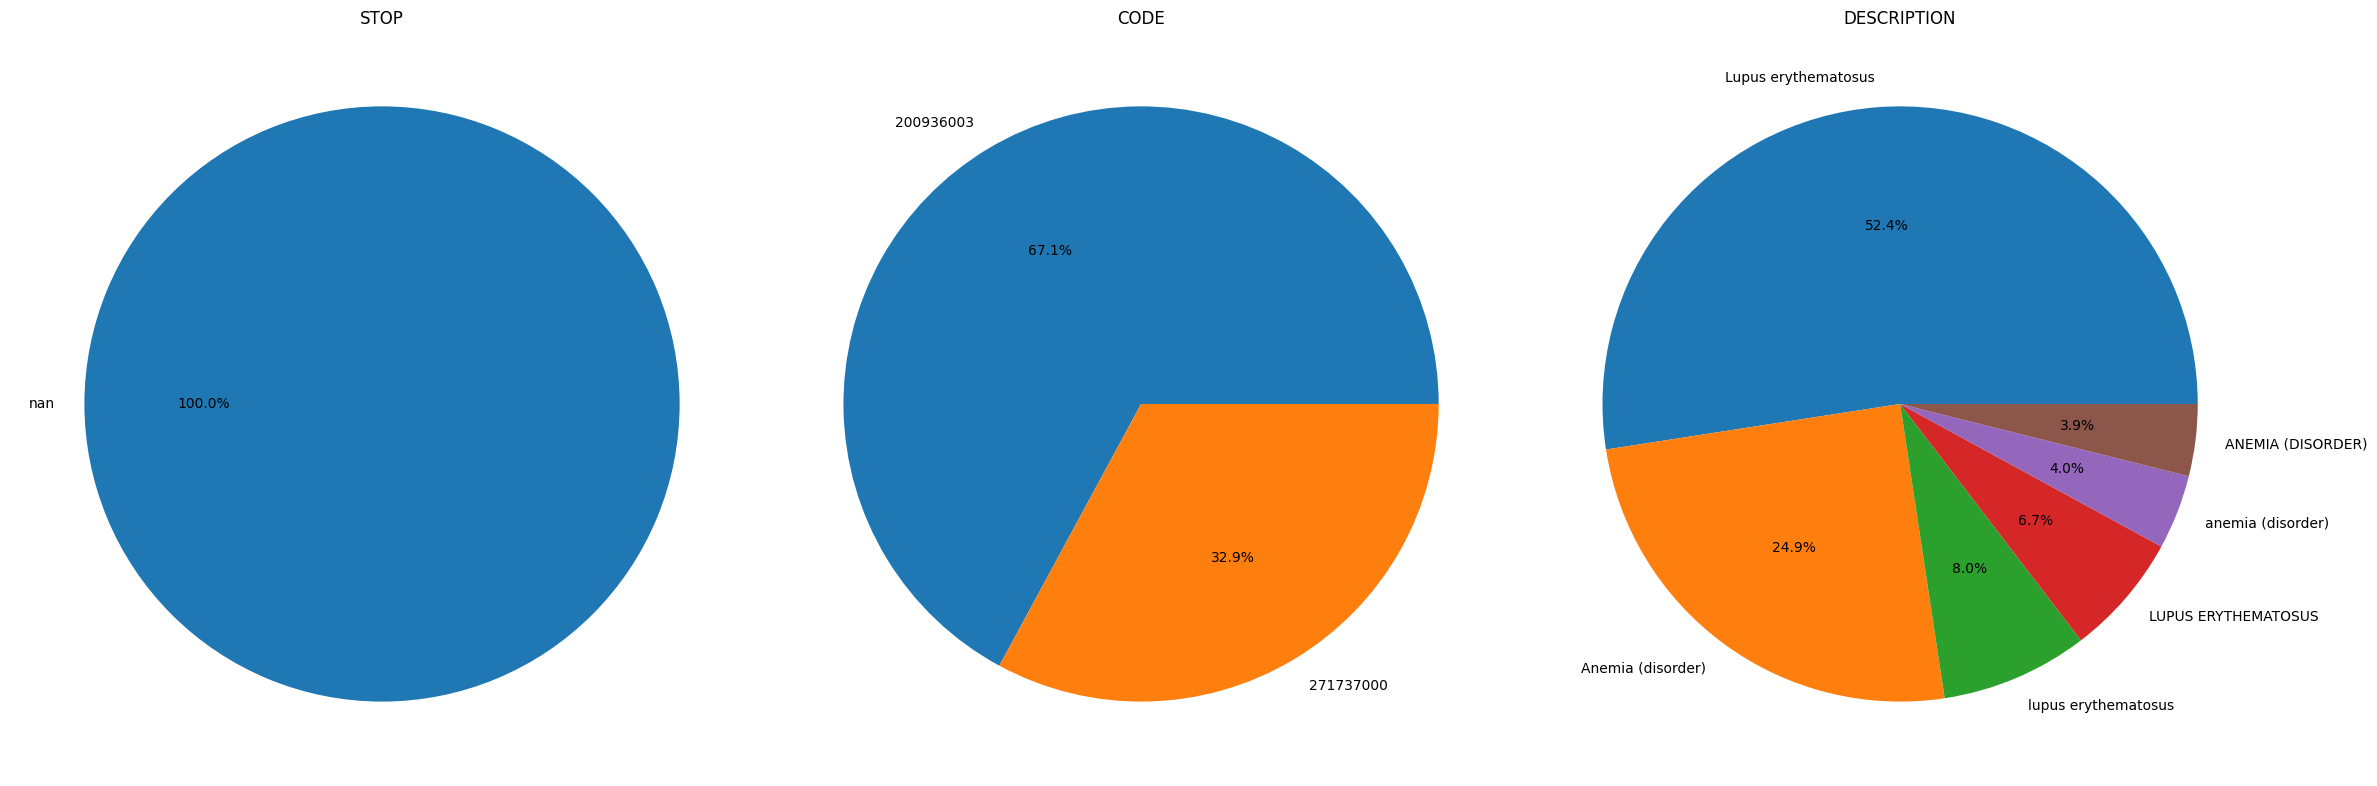

In [76]:
plot_pie_charts(condition,['STOP',"CODE","DESCRIPTION"])

In [77]:
# looking at a data point in the df
condition.iloc[1]

START                                    2001-11-07
STOP                                            NaN
PATIENT        239AE86A-96DB-6211-9042-D3F2850AABB8
ENCOUNTER      10d39d6f-7d98-8d03-8866-0a7cd363890b
CODE                                      200936003
DESCRIPTION                     Lupus erythematosus
Name: 1, dtype: object

### Mapping of diffrent coloum for the TUVA Input Layer
  * input_Layer_name : column , Type
  * condition_id : missing , varchar
  * patient_id : PATIENT , varchar
  * encounter_id : ENCOUNTER , varchar
  * claim_id : missing , varchar
  * recorded_date : missing , date
  * onset_date : START , date
  * resolved_date : STOP , date
  * status : missing , varchar
  * condition_type : missing , varchar
  * source_code_type : missing , varchar
  * source_code : CODE , varchar
  * source_description : DESCRIPTION , varchar
  * normalize_code : missing , varchar
  * normalized_description : missing , varchar
  * condition_rank : missing , integer
  * present_on_admit_code : missing , varchar
  * present_on_admit_description : missing , varchar
  * data_source : missing , varchar
  

## Note:
* Datatype of START needs to be changed
* Column DESCRIPTION has a Wrong data Entery, There are only 2 types of unique value but it shows 6 because of treating the Uppercase & lowecase diffrently.
* As the Code 200936003 & 271737000 belongs to the SNOWMED-CT, Hence its difficult to decide which code it should belong in the suroce_code_type



# Encounter Data

In [80]:
get_column_types_list(encounter)

[{'column_name': 'Id', 'data_type': dtype('O')},
 {'column_name': 'START', 'data_type': dtype('O')},
 {'column_name': 'STOP', 'data_type': dtype('O')},
 {'column_name': 'PATIENT', 'data_type': dtype('O')},
 {'column_name': 'ORGANIZATION', 'data_type': dtype('O')},
 {'column_name': 'PROVIDER', 'data_type': dtype('O')},
 {'column_name': 'PAYER', 'data_type': dtype('O')},
 {'column_name': 'ENCOUNTERCLASS', 'data_type': dtype('O')},
 {'column_name': 'CODE', 'data_type': dtype('int64')},
 {'column_name': 'DESCRIPTION', 'data_type': dtype('O')},
 {'column_name': 'BASE_ENCOUNTER_COST', 'data_type': dtype('float64')},
 {'column_name': 'TOTAL_CLAIM_COST', 'data_type': dtype('float64')},
 {'column_name': 'PAYER_COVERAGE', 'data_type': dtype('float64')},
 {'column_name': 'REASONCODE', 'data_type': dtype('float64')},
 {'column_name': 'REASONDESCRIPTION', 'data_type': dtype('O')}]

In [81]:
encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104262 entries, 0 to 104261
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   104262 non-null  object 
 1   START                104262 non-null  object 
 2   STOP                 104262 non-null  object 
 3   PATIENT              104262 non-null  object 
 4   ORGANIZATION         104262 non-null  object 
 5   PROVIDER             104262 non-null  object 
 6   PAYER                104262 non-null  object 
 7   ENCOUNTERCLASS       104262 non-null  object 
 8   CODE                 104262 non-null  int64  
 9   DESCRIPTION          104262 non-null  object 
 10  BASE_ENCOUNTER_COST  104262 non-null  float64
 11  TOTAL_CLAIM_COST     104262 non-null  float64
 12  PAYER_COVERAGE       104262 non-null  float64
 13  REASONCODE           12557 non-null   float64
 14  REASONDESCRIPTION    12557 non-null   object 
dtypes: float64(4), in

In [82]:
encounter.describe()

,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,104262.000,104262.000,104262.000,104262.000,12557.000
mean,240869266.360,123.135,319.159,49.636,204764455.414
std,136599984.562,21.181,210.405,142.919,16013170.223
min,33879002.000,68.260,68.260,0.000,200936003.000
25%,162673000.000,133.360,249.770,0.000,200936003.000
50%,162673000.000,133.360,269.360,0.000,200936003.000
75%,410620009.000,133.360,269.360,0.000,200936003.000
max,410620009.000,133.360,4345.410,3073.440,271737000.000


In [83]:
find_duplicate_rows(encounter)

No duplicate rows found.


In [84]:
number_unique_value(encounter,"Encounter Data Frame")

Data: Encounter Data Frame
The Number of Unique Values for Id is:104262
The Number of Unique Values for START is:103591
The Number of Unique Values for STOP is:104243
The Number of Unique Values for PATIENT is:10000
The Number of Unique Values for ORGANIZATION is:2795
The Number of Unique Values for PROVIDER is:2795
The Number of Unique Values for PAYER is:9
The Number of Unique Values for ENCOUNTERCLASS is:4
The Number of Unique Values for CODE is:4
The Number of Unique Values for DESCRIPTION is:4
The Number of Unique Values for BASE_ENCOUNTER_COST is:4
The Number of Unique Values for TOTAL_CLAIM_COST is:660
The Number of Unique Values for PAYER_COVERAGE is:520
The Number of Unique Values for REASONCODE is:2
The Number of Unique Values for REASONDESCRIPTION is:2


In [85]:
unique_value(encounter,['PAYER',"ENCOUNTERCLASS","CODE", "DESCRIPTION","BASE_ENCOUNTER_COST","REASONCODE","REASONDESCRIPTION"],"Condition Data Frame")

Data: Condition Data Frame
The Unique Values for PAYER is:['8fa6c185-e44e-3e34-8bd8-39be8694f4ce'
 'b046940f-1664-3047-bca7-dfa76be352a4'
 '734afbd6-4794-363b-9bc0-6a3981533ed5'
 'e03e23c9-4df1-3eb6-a62d-f70f02301496'
 '0133f751-9229-3cfd-815f-b6d4979bdd6a'
 'd31fccc3-1767-390d-966a-22a5156f4219'
 'a735bf55-83e9-331a-899d-a82a60b9f60c'
 'df166300-5a78-3502-a46a-832842197811'
 '26aab0cd-6aba-3e1b-ac5b-05c8867e762c']
The Unique Values for ENCOUNTERCLASS is:['wellness' 'outpatient' 'ambulatory' 'virtual']
The Unique Values for CODE is:[410620009 162673000  33879002 185347001]
The Unique Values for DESCRIPTION is:['Well child visit (procedure)'
 'General examination of patient (procedure)'
 'Administration of vaccine to produce active immunity (procedure)'
 'Encounter for problem']
The Unique Values for BASE_ENCOUNTER_COST is:[133.36 113.77  68.26  75.  ]
The Unique Values for REASONCODE is:[           nan 2.00936003e+08 2.71737000e+08]
The Unique Values for REASONDESCRIPTION is:[None 'Lup

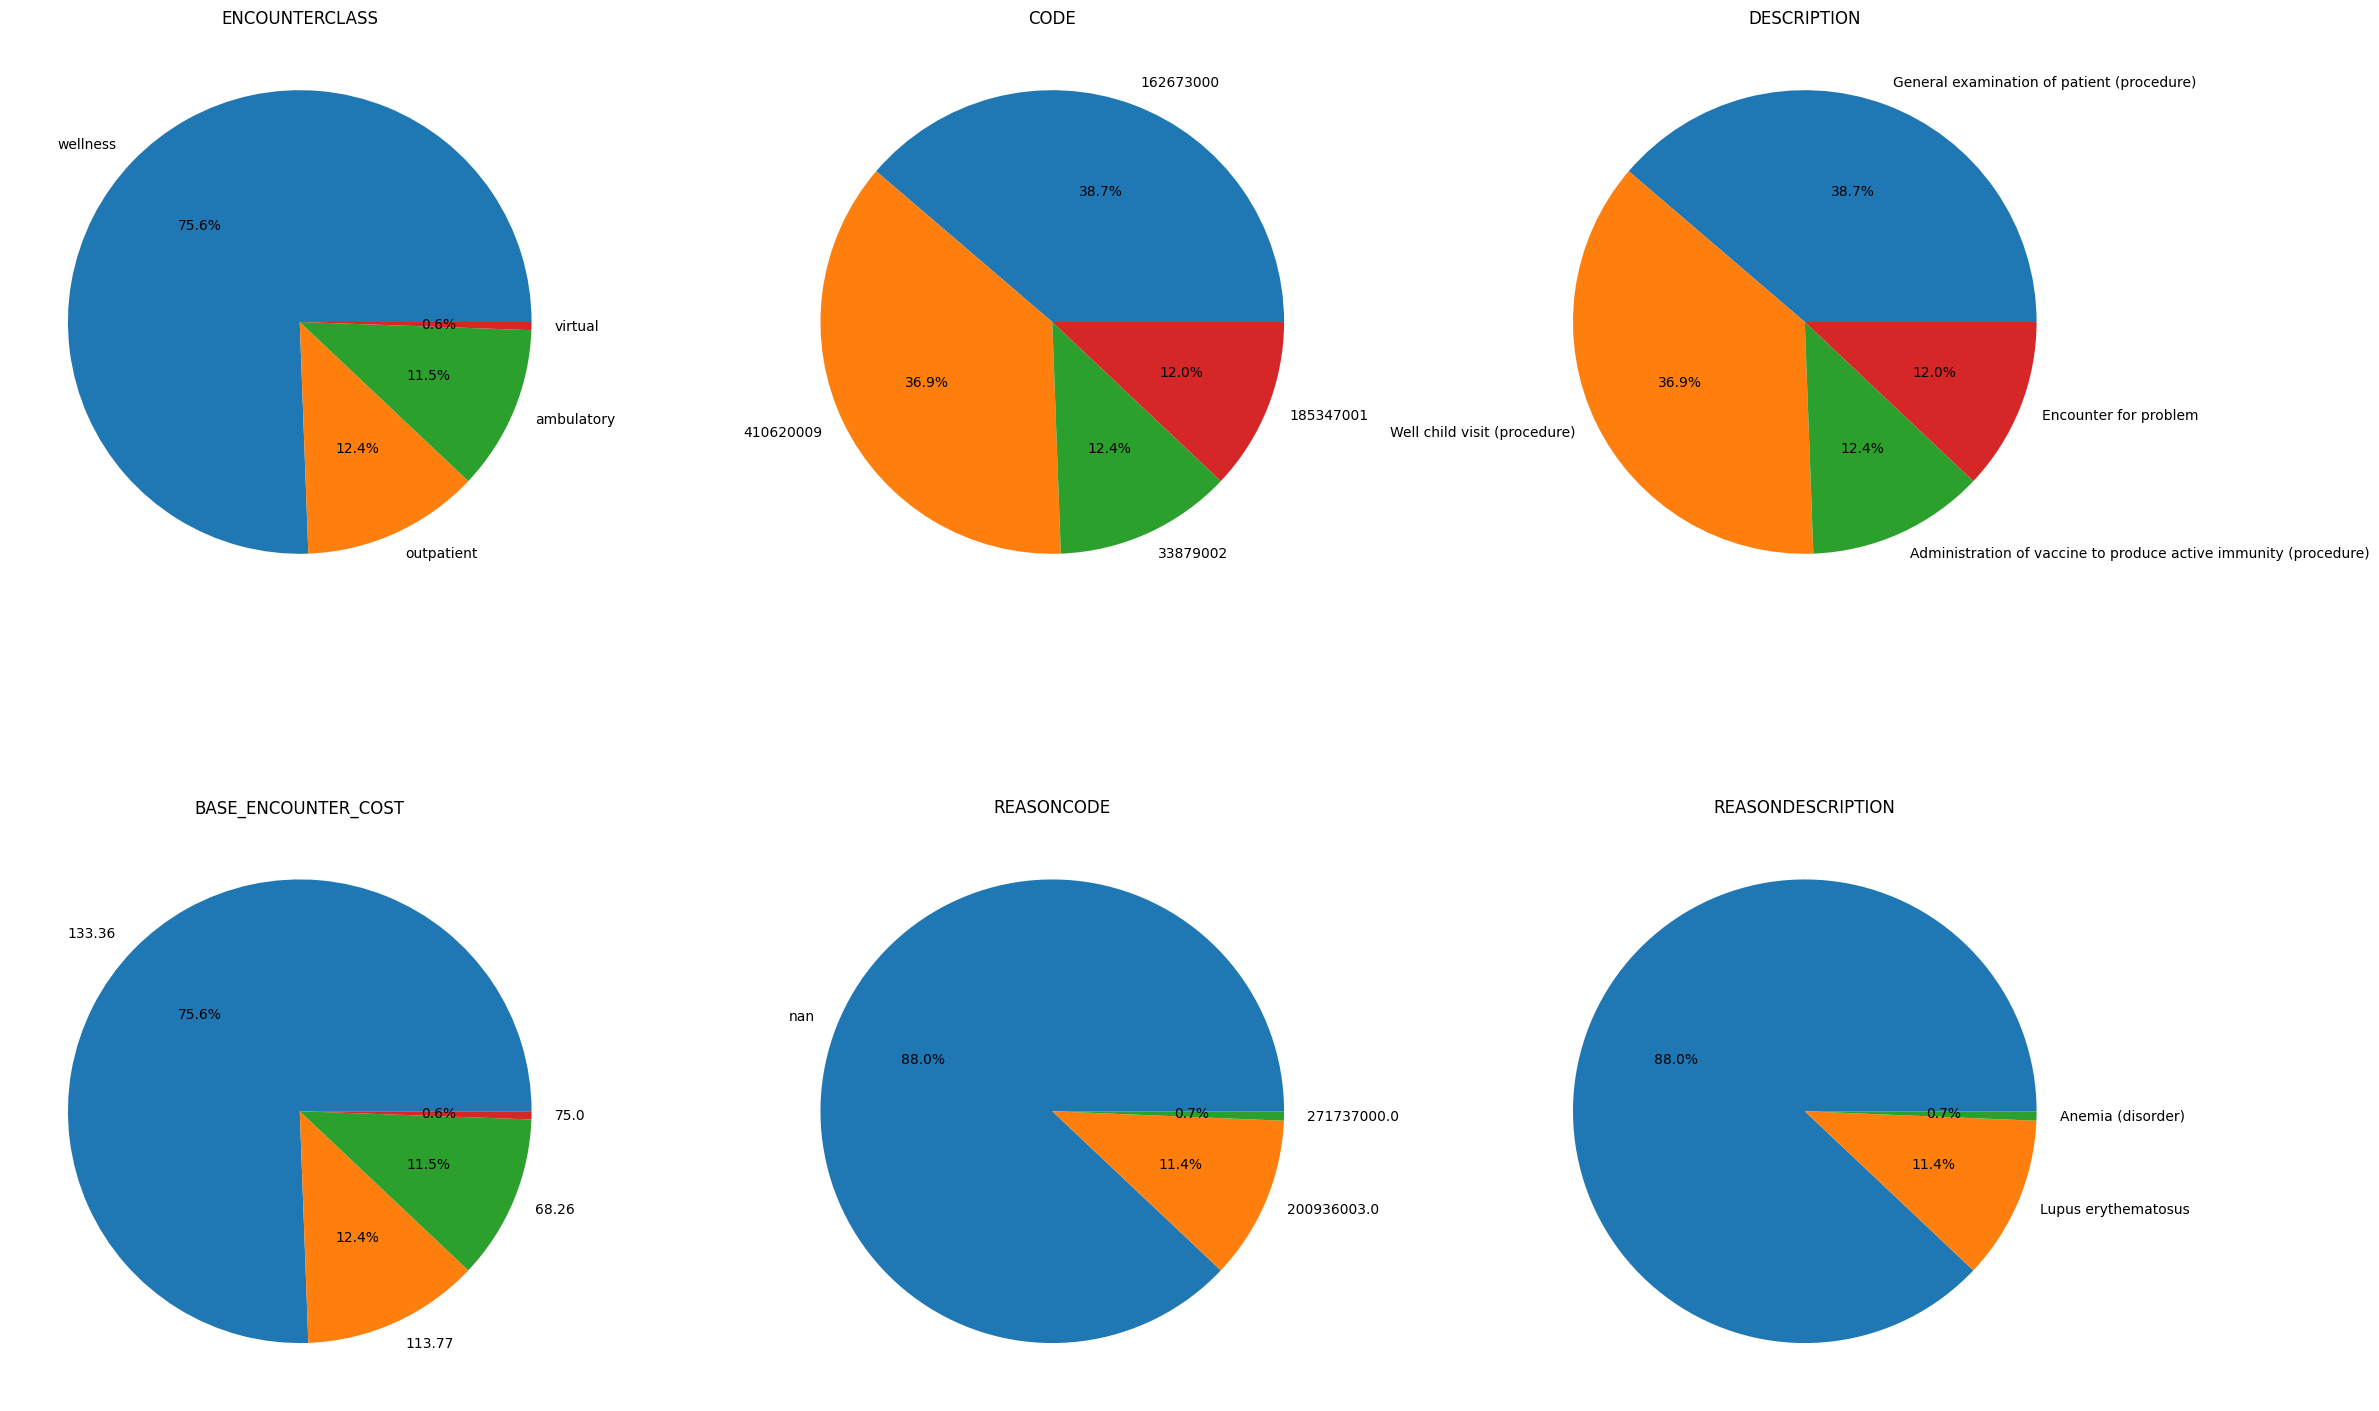

In [86]:
plot_pie_charts(encounter,["ENCOUNTERCLASS","CODE", "DESCRIPTION","BASE_ENCOUNTER_COST","REASONCODE","REASONDESCRIPTION"])

In [87]:
encounter.iloc[0]

Id                     6539c675-dcf2-cace-a90d-7f097d1799b3
START                                  2014-02-10T11:00:08Z
STOP                                   2014-02-10T11:15:08Z
PATIENT                54F1059E-6250-3949-6DD0-1DDA9B85D22A
ORGANIZATION           ef42ec52-a1c1-3fc5-8e52-da46f7f3970c
PROVIDER               35088bec-f756-35d8-8140-b2b017c0eacc
PAYER                  8fa6c185-e44e-3e34-8bd8-39be8694f4ce
ENCOUNTERCLASS                                     wellness
CODE                                              410620009
DESCRIPTION                    Well child visit (procedure)
BASE_ENCOUNTER_COST                                 133.360
TOTAL_CLAIM_COST                                    405.360
PAYER_COVERAGE                                        0.000
REASONCODE                                              NaN
REASONDESCRIPTION                                      None
Name: 0, dtype: object

## Snomed CODE & DESCRIPTION:
* 162673000 : General Examination
* 185347001 : Encounter of Problem
* 33879002 : Active Immunization
* 410620009 : Well Child visit

## Observations:
* 75% encounter were for wellness
* 0.6% encounter were only virtual
* REASONDESCRIPTION has 88% nan value
* So, for the tuva-project input layer for encounter, you can map the columns as follows:

  * paid_amount: 269.36 - 0.0 = 269.36 (from TOTAL_CLAIM_COST after subtracting PAYER_COVERAGE)
  * allowed_amount: 269.36 - 0.0 = 269.36 (from TOTAL_CLAIM_COST after subtracting PAYER_COVERAGE)
  * charge_amount: 133.36 (from BASE_ENCOUNTER_COST)

## Mapping of diffrent coloum for the TUVA Input Layer
  * input_Layer_name : column , Type
  * encounter_id : ID , varchar
  * patient_id : PATIENT
  * encounter_type : ENCOUNTERCLASS
  * encounter_start_date : START, date
  * encounter_end_date : STOP , date
  * length_of_stay : STOP-STRT, number
  * admit_source_code : missing , varchar
  * admit_source_description : missing , varchar
  * admit_type_code : CODE , varchar , varchar
  * admit_type_description : DESCRIPTION , varchar
  * discharge_disposition_code : Missing , varchar
  * discharge_disposition_description : missing , varchar
  * attending_provider_id : PROVIDER , varcahr
  * facility_npi : missing , varchar
  * primary_diagnosis_code_type :  REASONCODE , varchar
  * primary_diagnosis_description : REASONDESCRIPTION , varchar
  * ms_drg_code : missing , varchar
  * ms_drg_description : missing , Varchar
  * apr_drg_code : msiing , Varchar
  * apr_drg_description : missing, vrchar
  * paid_amount : TOTAL_CLAIM_COST - PAYER_COVERAGE , number
  * allowed_amount = TOTAL_CLAIM_COST - PAYER_COVERAGE , number
  * charge_amount = BASE_ENCOUNTER_COST , number
  * data_source : missing , varchar

#Medication Data

In [175]:
get_column_types_list(medication)

[{'column_name': 'START', 'data_type': dtype('O')},
 {'column_name': 'STOP', 'data_type': dtype('O')},
 {'column_name': 'PATIENT', 'data_type': dtype('O')},
 {'column_name': 'PAYER', 'data_type': dtype('O')},
 {'column_name': 'ENCOUNTER', 'data_type': dtype('O')},
 {'column_name': 'CODE', 'data_type': dtype('int64')},
 {'column_name': 'DESCRIPTION', 'data_type': dtype('O')},
 {'column_name': 'BASE_COST', 'data_type': dtype('float64')},
 {'column_name': 'PAYER_COVERAGE', 'data_type': dtype('float64')},
 {'column_name': 'DISPENSES', 'data_type': dtype('int64')},
 {'column_name': 'TOTALCOST', 'data_type': dtype('float64')},
 {'column_name': 'REASONCODE', 'data_type': dtype('float64')},
 {'column_name': 'REASONDESCRIPTION', 'data_type': dtype('O')}]

In [176]:
medication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22237 entries, 0 to 22236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   START              22237 non-null  object 
 1   STOP               19018 non-null  object 
 2   PATIENT            22237 non-null  object 
 3   PAYER              22237 non-null  object 
 4   ENCOUNTER          22237 non-null  object 
 5   CODE               22237 non-null  int64  
 6   DESCRIPTION        22237 non-null  object 
 7   BASE_COST          22237 non-null  float64
 8   PAYER_COVERAGE     22237 non-null  float64
 9   DISPENSES          22237 non-null  int64  
 10  TOTALCOST          22237 non-null  float64
 11  REASONCODE         21924 non-null  float64
 12  REASONDESCRIPTION  21924 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.2+ MB


In [177]:
medication.describe()

,CODE,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE
count,2.223700e+04,22237.000000,22237.000000,22237.000000,22237.000000,21924.0
mean,3.635626e+05,160.660295,23.040369,31.272114,8582.331193,200936003.0
std,2.386926e+05,153.233418,69.314682,97.261063,28250.956109,0.0
min,2.418340e+05,0.360000,0.000000,1.000000,0.360000,200936003.0
25%,2.418340e+05,16.020000,0.000000,1.000000,16.170000,200936003.0
50%,3.126150e+05,134.570000,0.000000,1.000000,139.320000,200936003.0
75%,3.126150e+05,289.950000,0.000000,1.000000,343.860000,200936003.0
max,2.001499e+06,587.300000,460.200000,935.000000,337447.280000,200936003.0


In [178]:
find_duplicate_rows(medication)


No duplicate rows found.


In [179]:
number_unique_value(medication,"Medication Data Frame")


Data: Medication Data Frame
The Number of Unique Values for START is:12166
The Number of Unique Values for STOP is:9983
The Number of Unique Values for PATIENT is:2784
The Number of Unique Values for PAYER is:8
The Number of Unique Values for ENCOUNTER is:12166
The Number of Unique Values for CODE is:5
The Number of Unique Values for DESCRIPTION is:15
The Number of Unique Values for BASE_COST is:12082
The Number of Unique Values for PAYER_COVERAGE is:3474
The Number of Unique Values for DISPENSES is:616
The Number of Unique Values for TOTALCOST is:13056
The Number of Unique Values for REASONCODE is:1
The Number of Unique Values for REASONDESCRIPTION is:1


In [180]:
unique_value(medication,["PAYER","CODE", "DESCRIPTION","REASONCODE","REASONDESCRIPTION"],"medication")

Data: medication
The Unique Values for PAYER is:['0133f751-9229-3cfd-815f-b6d4979bdd6a'
 '734afbd6-4794-363b-9bc0-6a3981533ed5'
 'b046940f-1664-3047-bca7-dfa76be352a4'
 'e03e23c9-4df1-3eb6-a62d-f70f02301496'
 'd31fccc3-1767-390d-966a-22a5156f4219'
 'a735bf55-83e9-331a-899d-a82a60b9f60c'
 '8fa6c185-e44e-3e34-8bd8-39be8694f4ce'
 '26aab0cd-6aba-3e1b-ac5b-05c8867e762c']
The Unique Values for CODE is:[ 849574  312615  241834 2001499  310325]
The Unique Values for DESCRIPTION is:['Naproxen sodium 220 MG Oral Tablet' 'predniSONE 20 MG Oral Tablet'
 'cycloSPORINE  modified 100 MG Oral Capsule'
 'CYCLOSPORINE  MODIFIED 100 MG ORAL CAPSULE'
 'NAPROXEN SODIUM 220 MG ORAL TABLET' 'PREDNISONE 20 MG ORAL TABLET'
 'prednisone 20 mg oral tablet' 'Vitamin B12 5 MG/ML Injectable Solution'
 'ferrous sulfate 325 MG Oral Tablet' 'naproxen sodium 220 mg oral tablet'
 'cyclosporine  modified 100 mg oral capsule'
 'ferrous sulfate 325 mg oral tablet' 'FERROUS SULFATE 325 MG ORAL TABLET'
 'VITAMIN B12 5 MG/ML 

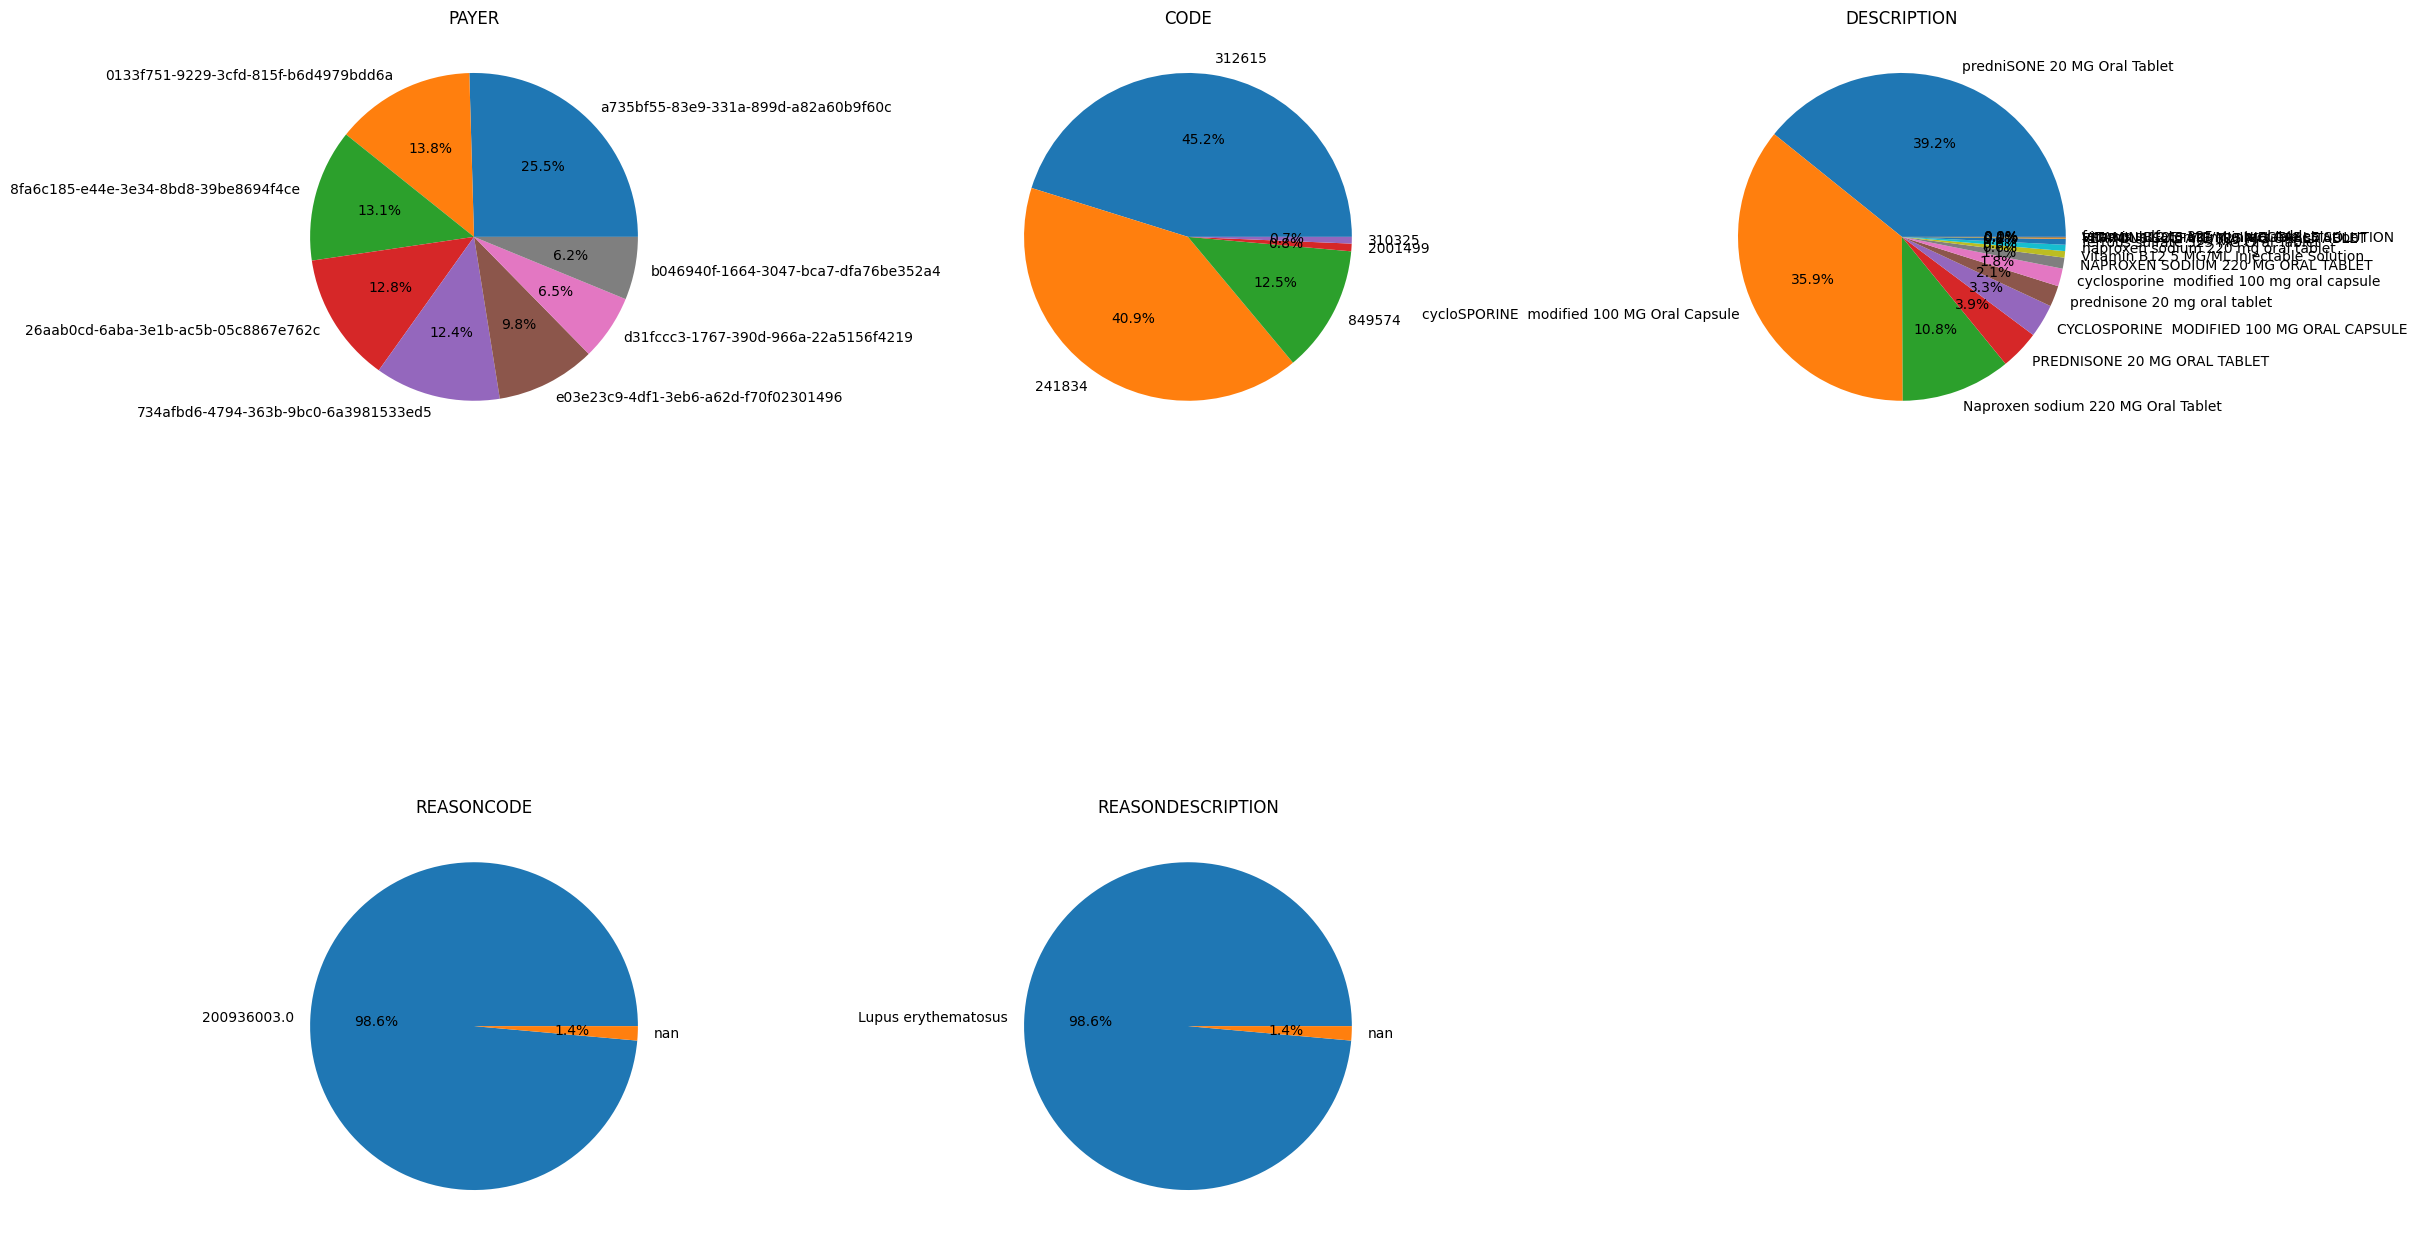

In [181]:
plot_pie_charts(medication,["PAYER","CODE", "DESCRIPTION","REASONCODE","REASONDESCRIPTION"])

In [182]:
medication.iloc[1]

START                                2020-04-22T02:47:09Z
STOP                                 2020-05-17T02:47:09Z
PATIENT              28d7b56c-6056-d0a2-2991-39d6e917216c
PAYER                0133f751-9229-3cfd-815f-b6d4979bdd6a
ENCOUNTER            402DFAEB-1888-F562-4651-F75203EB1E28
CODE                                               312615
DESCRIPTION                  predniSONE 20 MG Oral Tablet
BASE_COST                                           16.04
PAYER_COVERAGE                                        0.0
DISPENSES                                               1
TOTALCOST                                           16.04
REASONCODE                                    200936003.0
REASONDESCRIPTION                     Lupus erythematosus
Name: 1, dtype: object

## column matching:
* rxnorm_code : CODE
* rxnorm_description : DESCRIPTION


# Observations:
* Data entered in the column DESCRIPTION seems wrong as the description is having problem with casing.
* Need to Look into the REASONCODE as there is another reason code missing for "anemia".


## Mapping of diffrent coloum for the TUVA Input Layer
  * input_Layer_name : column , Type
  * medication_id : ENCOUNTER , varchar
  * patient_id : PAPATIENT , varchar
  * encounter_id : ENCOUNTER , varchar
  * dispensing_date : STOP , date
  * prescribing_date : START , date
  * source_code_type : Missing, varchar
  * source_code : missing, varchar
  * source_description : missing, varchar
  * ndc_code : missing , varchar
  * ndc_description : missing , varchar
  * rxnorm_code : CODE, varchar
  * rxnorm_description : DESCRIPTION,  vrachar
  * atc_code : missing , varchar
  * atc_description : missing , varchar
  * route : missing : varchar
  * strength : DESCRIPTIOIN regesx , varchar
  * quantity : missing , varchar
  * quantity_unit : missing , varchar
  * days_supply : STOP - START , numer
  * practitioner_id : missing , varchar
  * data_source : missing , varchar

#Observation Data

In [51]:
get_column_types_list(symptoms)

[{'column_name': 'PATIENT', 'data_type': dtype('O')},
 {'column_name': 'GENDER', 'data_type': dtype('float64')},
 {'column_name': 'RACE', 'data_type': dtype('O')},
 {'column_name': 'ETHNICITY', 'data_type': dtype('O')},
 {'column_name': 'AGE_BEGIN', 'data_type': dtype('int64')},
 {'column_name': 'AGE_END', 'data_type': dtype('float64')},
 {'column_name': 'PATHOLOGY', 'data_type': dtype('O')},
 {'column_name': 'NUM_SYMPTOMS', 'data_type': dtype('int64')},
 {'column_name': 'SYMPTOMS', 'data_type': dtype('O')}]

In [24]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PATIENT       1423 non-null   object 
 1   GENDER        0 non-null      float64
 2   RACE          1423 non-null   object 
 3   ETHNICITY     1423 non-null   object 
 4   AGE_BEGIN     1423 non-null   int64  
 5   AGE_END       0 non-null      float64
 6   PATHOLOGY     1423 non-null   object 
 7   NUM_SYMPTOMS  1423 non-null   int64  
 8   SYMPTOMS      1423 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 100.2+ KB


In [25]:
symptoms.describe()

,GENDER,AGE_BEGIN,AGE_END,NUM_SYMPTOMS
count,0.0,1423.000000,0.0,1423.000000
mean,NaN,45.673226,NaN,3.859452
std,NaN,13.345750,NaN,0.347677
min,NaN,25.000000,NaN,3.000000
25%,NaN,34.000000,NaN,4.000000
50%,NaN,44.000000,NaN,4.000000
75%,NaN,55.000000,NaN,4.000000
max,NaN,79.000000,NaN,4.000000


In [26]:
number_unique_value(symptoms,"Symptoms Data Frame")

Data: Symptoms Data Frame
The Number of Unique Values for PATIENT is:948
The Number of Unique Values for GENDER is:0
The Number of Unique Values for RACE is:6
The Number of Unique Values for ETHNICITY is:2
The Number of Unique Values for AGE_BEGIN is:55
The Number of Unique Values for AGE_END is:0
The Number of Unique Values for PATHOLOGY is:2
The Number of Unique Values for NUM_SYMPTOMS is:2
The Number of Unique Values for SYMPTOMS is:948


In [27]:
unique_value(symptoms,["RACE","ETHNICITY","PATHOLOGY","NUM_SYMPTOMS"],"Condition Data Frame")

Data: Condition Data Frame
The Unique Values for RACE is:['white' 'black' 'asian' 'native' 'hawaiian' 'other']
The Unique Values for ETHNICITY is:['hispanic' 'nonhispanic']
The Unique Values for PATHOLOGY is:['Lupus erythematosus' 'Anemia (disorder)']
The Unique Values for NUM_SYMPTOMS is:[4 3]


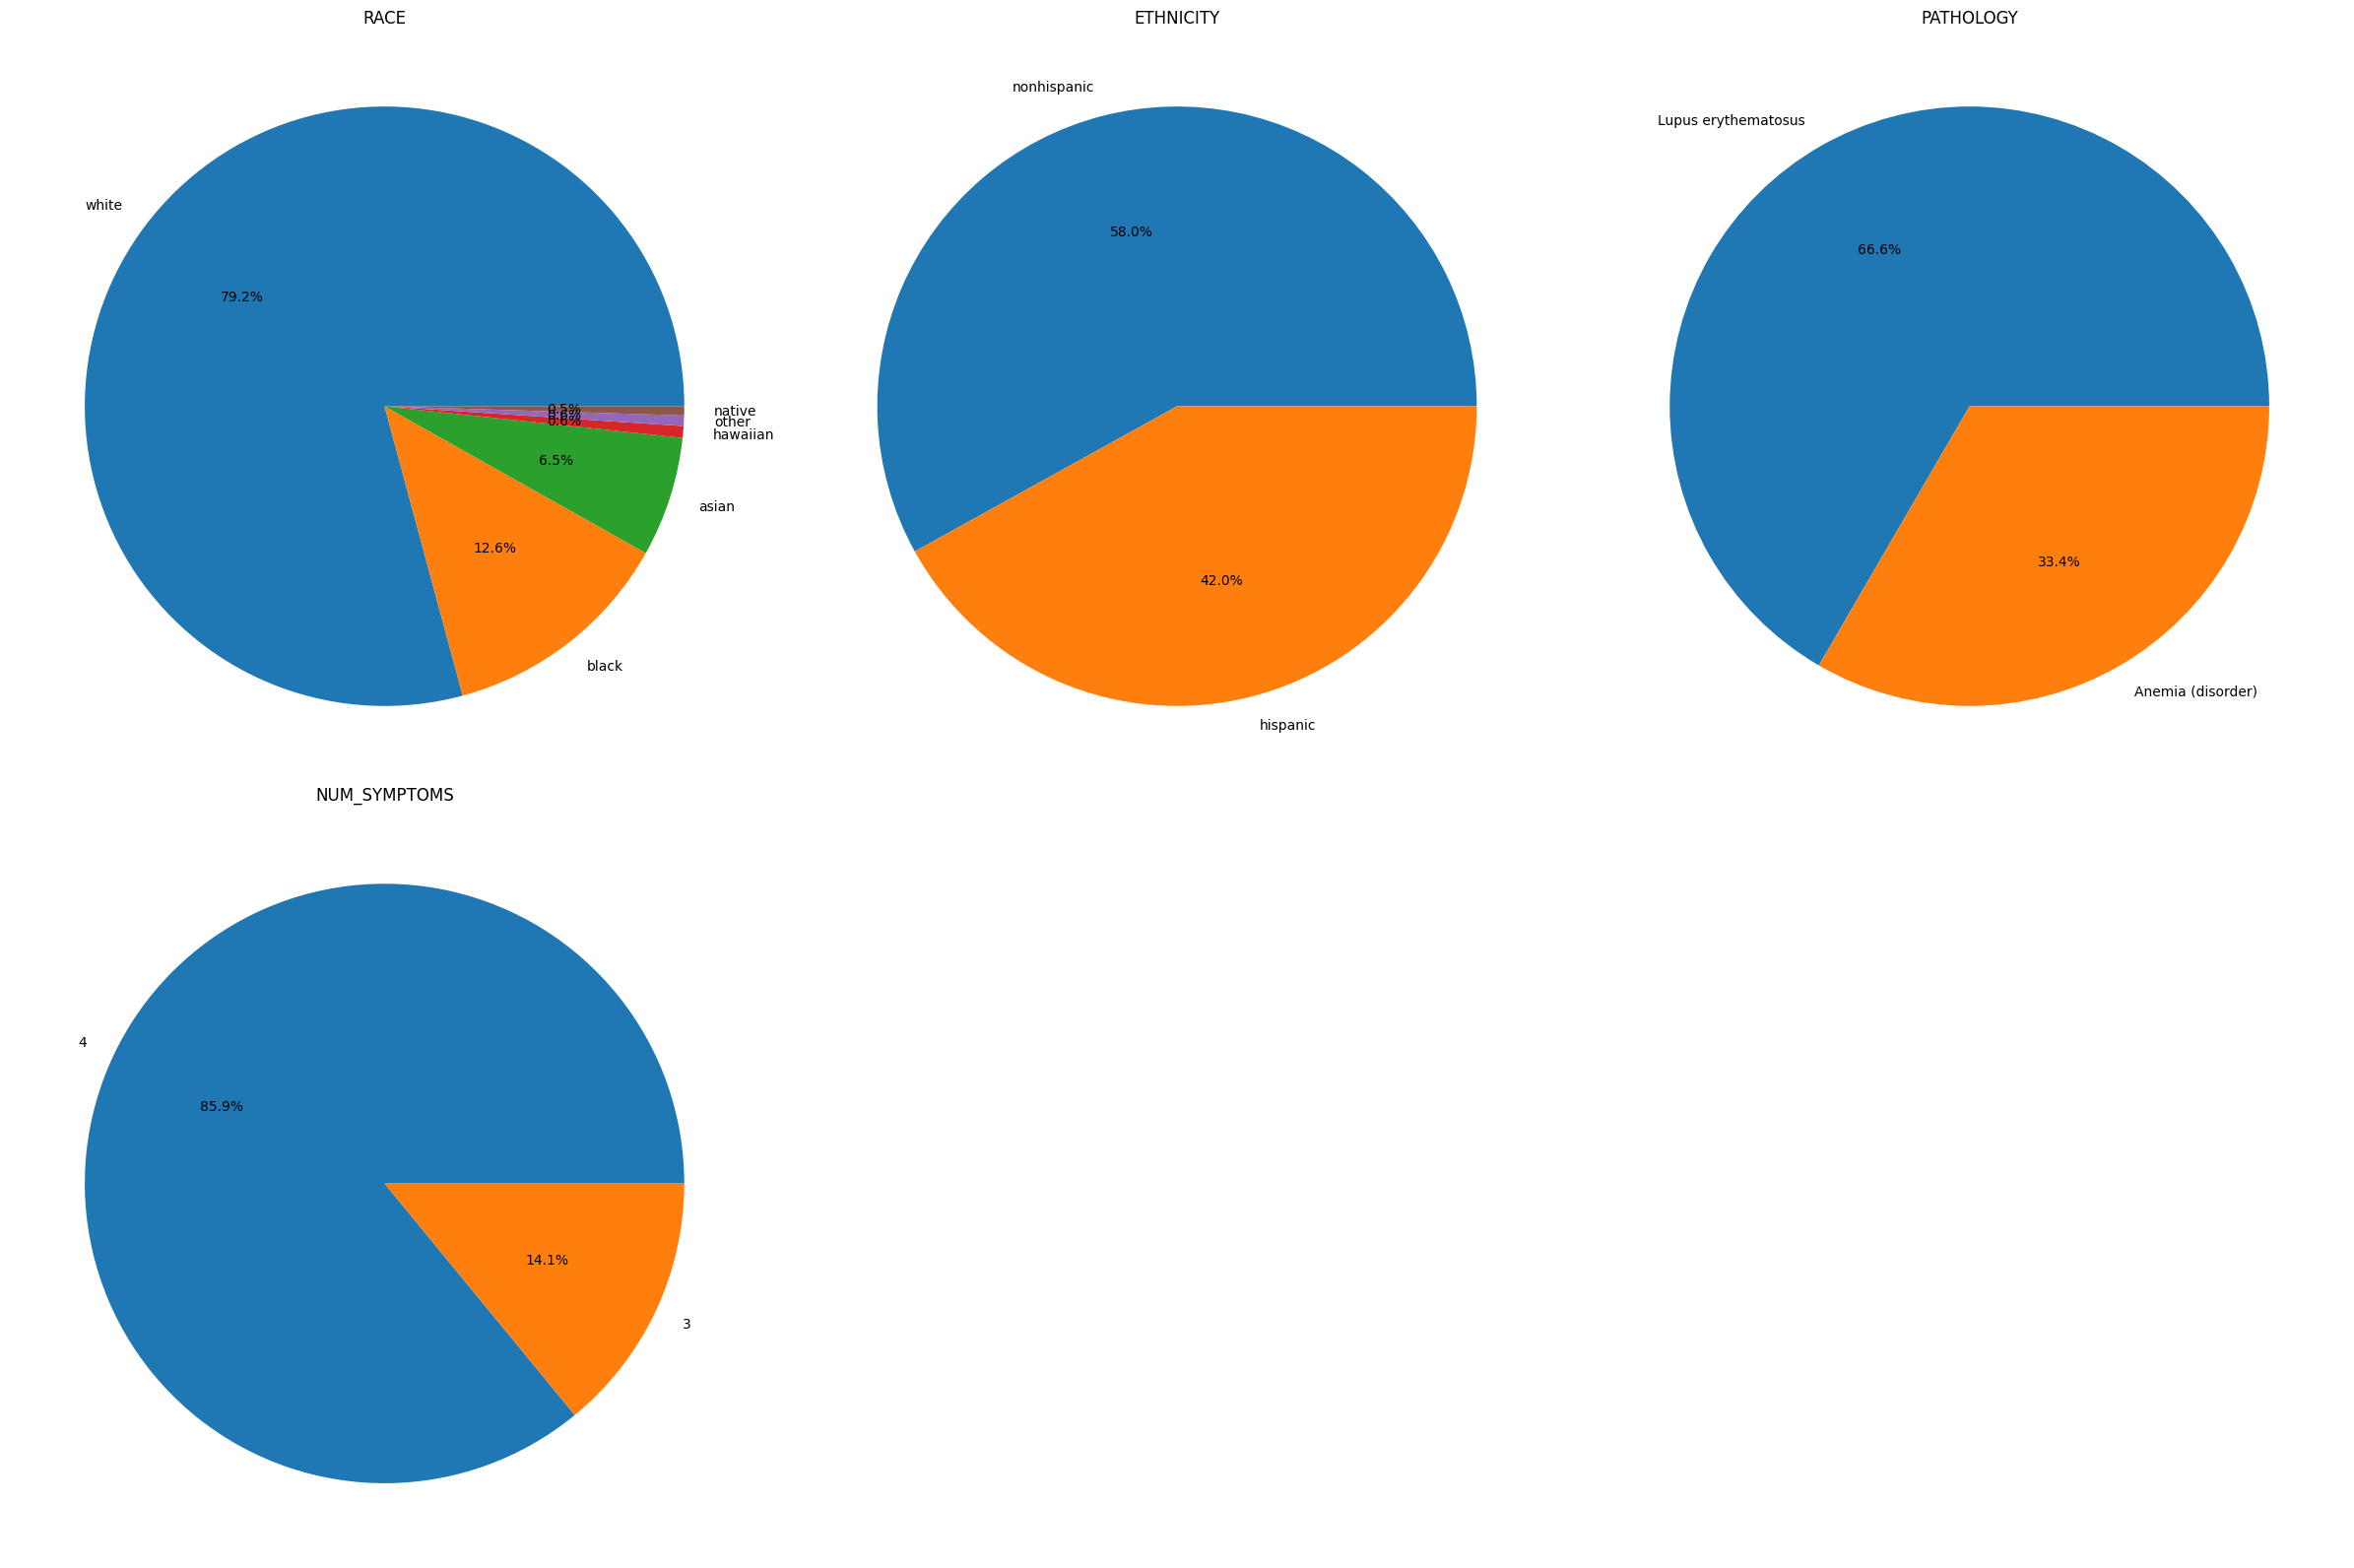

In [28]:
plot_pie_charts(symptoms,["RACE","ETHNICITY","PATHOLOGY","NUM_SYMPTOMS"])

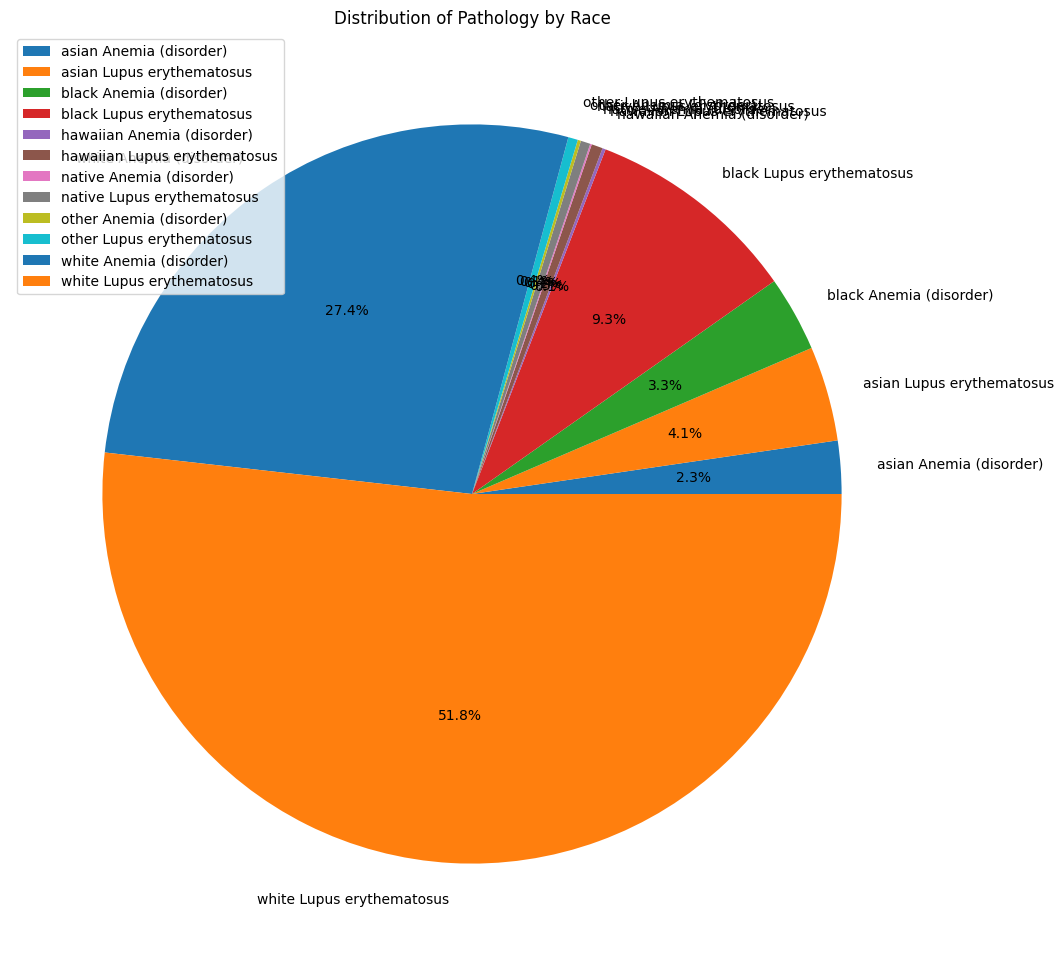

In [29]:
create_pie_plot(symptoms, 'RACE', 'PATHOLOGY', title='Distribution of Pathology by Race')


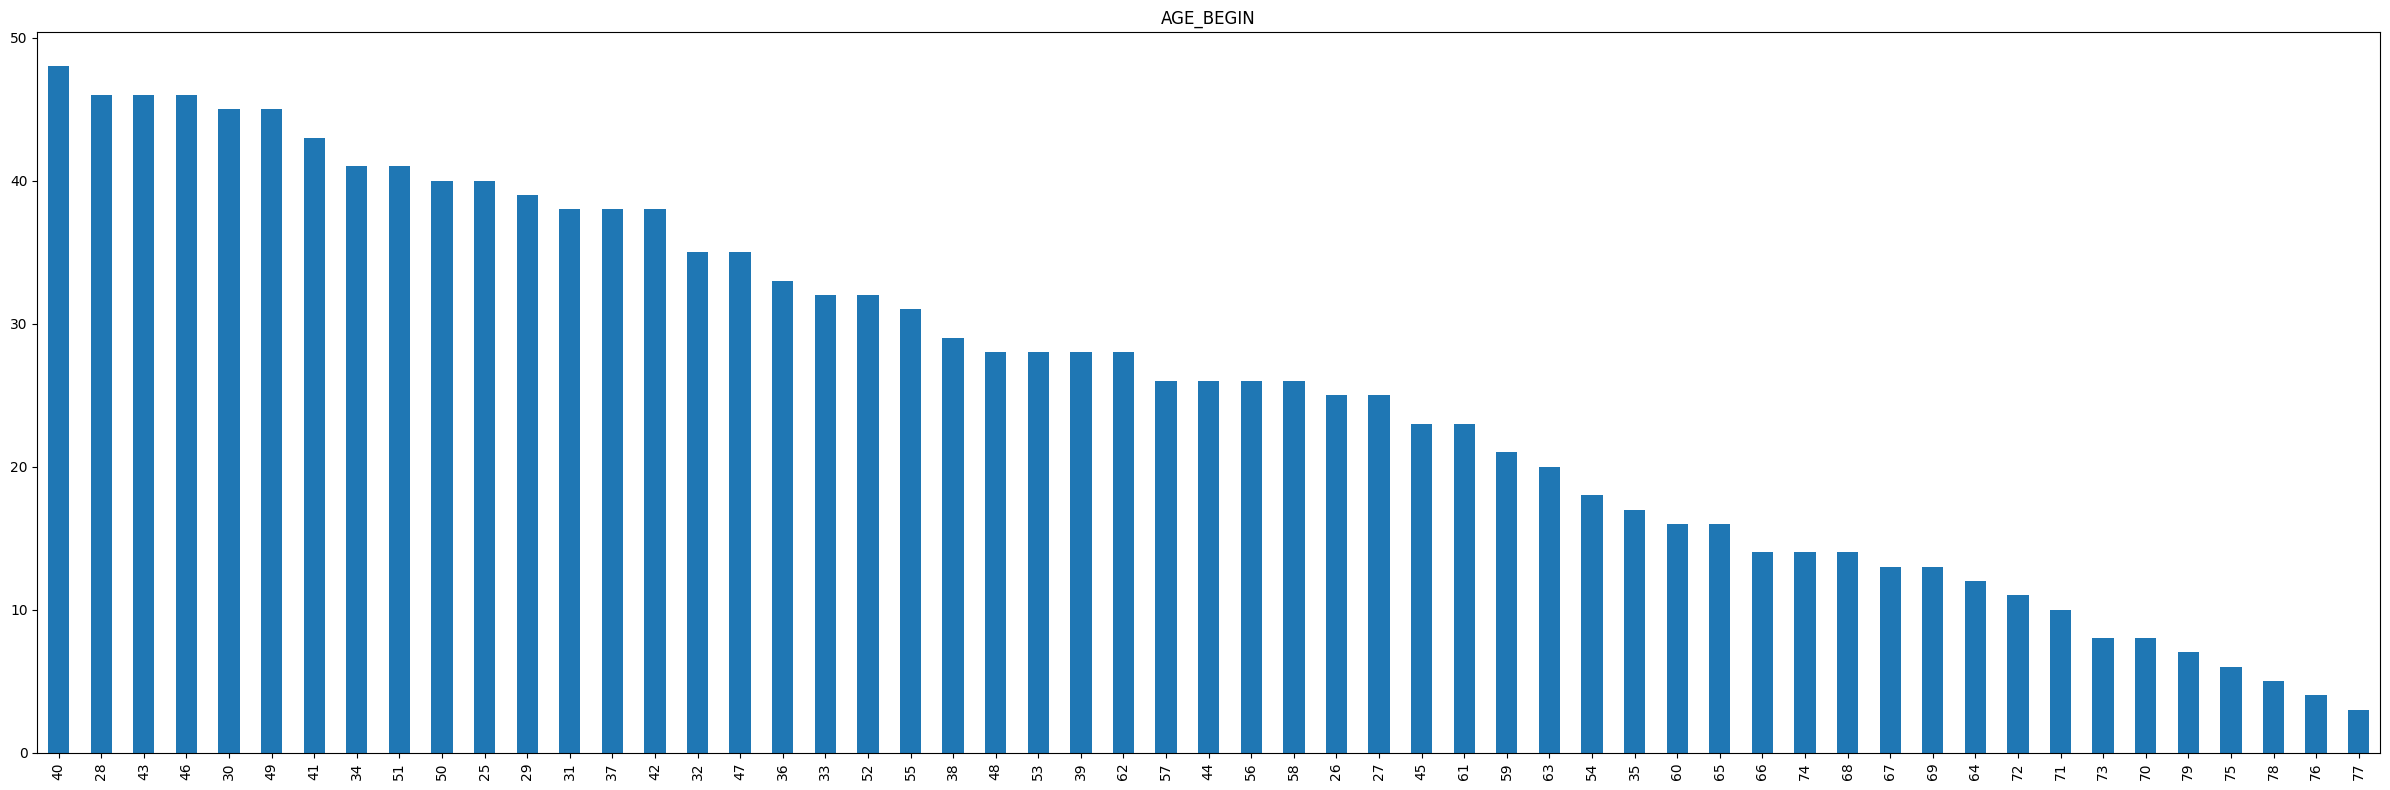

In [31]:
plot_bar_charts(symptoms, ["AGE_BEGIN"])


In [32]:
symptoms.iloc[1]

PATIENT              6c434506-fb4b-3e3f-c19d-553dec3b6c17
GENDER                                                NaN
RACE                                                black
ETHNICITY                                        hispanic
AGE_BEGIN                                              58
AGE_END                                               NaN
PATHOLOGY                             Lupus erythematosus
NUM_SYMPTOMS                                            4
SYMPTOMS        Rash:19;Joint Pain:44;Fatigue:48;Fever:15
Name: 1, dtype: object

## Observations:
* 80% of Paitients are White in that 65.39% have the Lupus.
* 51.8% of White have Lupus


## Mapping of diffrent coloum for the TUVA Input Layer
  * input_Layer_name : column , Type
  * observation_id : missing, varchar
  * patient_id : PATIENT
  * encounter_id : Missing , varchar
  * panel_id : missing , varchar
  * observation_date : missing , varchar
  * observation_type : missing
  * source_code_type : missing
  * source_code : missing
  * source_description : missing
  * normalized_code_type : missing
  * normalized_code : missing
  * normalized_description : missing
  * result : PATHOLOGY, missing
  * source_units : missing
  * normalized_units : missing
  * source_reference_range_low : missing
  * source_reference_range_high : missing
  * normalized_reference_range_low : missing
  * normalized_reference_range_high : missing
  * data_source : missing

# Paitents

In [33]:
sex['Id'].nunique()

10000

In [52]:
get_column_types_list(patient)

[{'column_name': 'PATIENT_ID', 'data_type': dtype('O')},
 {'column_name': 'BIRTHDATE', 'data_type': dtype('O')},
 {'column_name': 'DEATHDATE', 'data_type': dtype('float64')},
 {'column_name': 'SSN', 'data_type': dtype('O')},
 {'column_name': 'DRIVERS', 'data_type': dtype('O')},
 {'column_name': 'PASSPORT', 'data_type': dtype('O')},
 {'column_name': 'PREFIX', 'data_type': dtype('O')},
 {'column_name': 'FIRST', 'data_type': dtype('O')},
 {'column_name': 'LAST', 'data_type': dtype('O')},
 {'column_name': 'SUFFIX', 'data_type': dtype('O')},
 {'column_name': 'MAIDEN', 'data_type': dtype('O')},
 {'column_name': 'MARITAL', 'data_type': dtype('O')},
 {'column_name': 'RACE', 'data_type': dtype('O')},
 {'column_name': 'ETHNICITY', 'data_type': dtype('O')},
 {'column_name': 'GENDER', 'data_type': dtype('float64')},
 {'column_name': 'BIRTHPLACE', 'data_type': dtype('O')},
 {'column_name': 'ADDRESS', 'data_type': dtype('O')},
 {'column_name': 'CITY', 'data_type': dtype('O')},
 {'column_name': 'STAT

In [34]:
# patient = pd.merge(patient,sex, left_on="PATIENT_ID",right_on="Id")

In [35]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PATIENT_ID           10000 non-null  object 
 1   BIRTHDATE            10000 non-null  object 
 2   DEATHDATE            0 non-null      float64
 3   SSN                  10000 non-null  object 
 4   DRIVERS              7680 non-null   object 
 5   PASSPORT             7039 non-null   object 
 6   PREFIX               7337 non-null   object 
 7   FIRST                10000 non-null  object 
 8   LAST                 10000 non-null  object 
 9   SUFFIX               59 non-null     object 
 10  MAIDEN               2352 non-null   object 
 11  MARITAL              5854 non-null   object 
 12  RACE                 10000 non-null  object 
 13  ETHNICITY            10000 non-null  object 
 14  GENDER               0 non-null      float64
 15  BIRTHPLACE           10000 non-null  

In [36]:
patient.describe()

,DEATHDATE,GENDER,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
count,0.0,0.0,9710.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,NaN,NaN,48188.824717,74947.406200,0.309868,-97.548956,10489.406391,1817.903496,85358.40780
std,NaN,NaN,690.565166,13036.344689,0.020044,2.438536,5256.509164,2462.371193,141329.22638
min,NaN,NaN,35013.000000,0.000000,0.258876,-106.646755,100.000000,0.000000,-986794.00000
25%,NaN,NaN,48113.000000,75904.000000,0.296555,-98.195686,6889.780000,0.000000,25129.25000
50%,NaN,NaN,48201.000000,77099.000000,0.306608,-97.126683,10761.620000,0.000000,51009.50000
75%,NaN,NaN,48355.000000,78260.000000,0.327973,-95.921881,13374.712500,3578.720000,94730.75000
max,NaN,NaN,48507.000000,88063.000000,0.365969,-93.752308,27627.160000,10808.450000,998831.00000


In [37]:
number_unique_value(patient,"Patient Data Frame")


Data: Patient Data Frame
The Number of Unique Values for PATIENT_ID is:10000
The Number of Unique Values for BIRTHDATE is:8310
The Number of Unique Values for DEATHDATE is:0
The Number of Unique Values for SSN is:9949
The Number of Unique Values for DRIVERS is:7366
The Number of Unique Values for PASSPORT is:7039
The Number of Unique Values for PREFIX is:3
The Number of Unique Values for FIRST is:3693
The Number of Unique Values for LAST is:1087
The Number of Unique Values for SUFFIX is:3
The Number of Unique Values for MAIDEN is:810
The Number of Unique Values for MARITAL is:4
The Number of Unique Values for RACE is:6
The Number of Unique Values for ETHNICITY is:2
The Number of Unique Values for GENDER is:0
The Number of Unique Values for BIRTHPLACE is:886
The Number of Unique Values for ADDRESS is:10000
The Number of Unique Values for CITY is:875
The Number of Unique Values for STATE is:2
The Number of Unique Values for COUNTY is:223
The Number of Unique Values for FIPS is:225
The Nu

In [40]:
unique_value(patient,["PREFIX","SUFFIX","MARITAL","RACE","STATE"],"Condition Data Frame")

Data: Condition Data Frame
The Unique Values for PREFIX is:['Ms.' 'Mr.' 'Mrs.' nan]
The Unique Values for SUFFIX is:[nan 'PhD' 'MD' 'JD']
The Unique Values for MARITAL is:[nan 'M' 'S' 'D' 'W']
The Unique Values for RACE is:['white' 'native' 'black' 'asian' 'hawaiian' 'other']
The Unique Values for STATE is:['Texas' 'Louisiana']


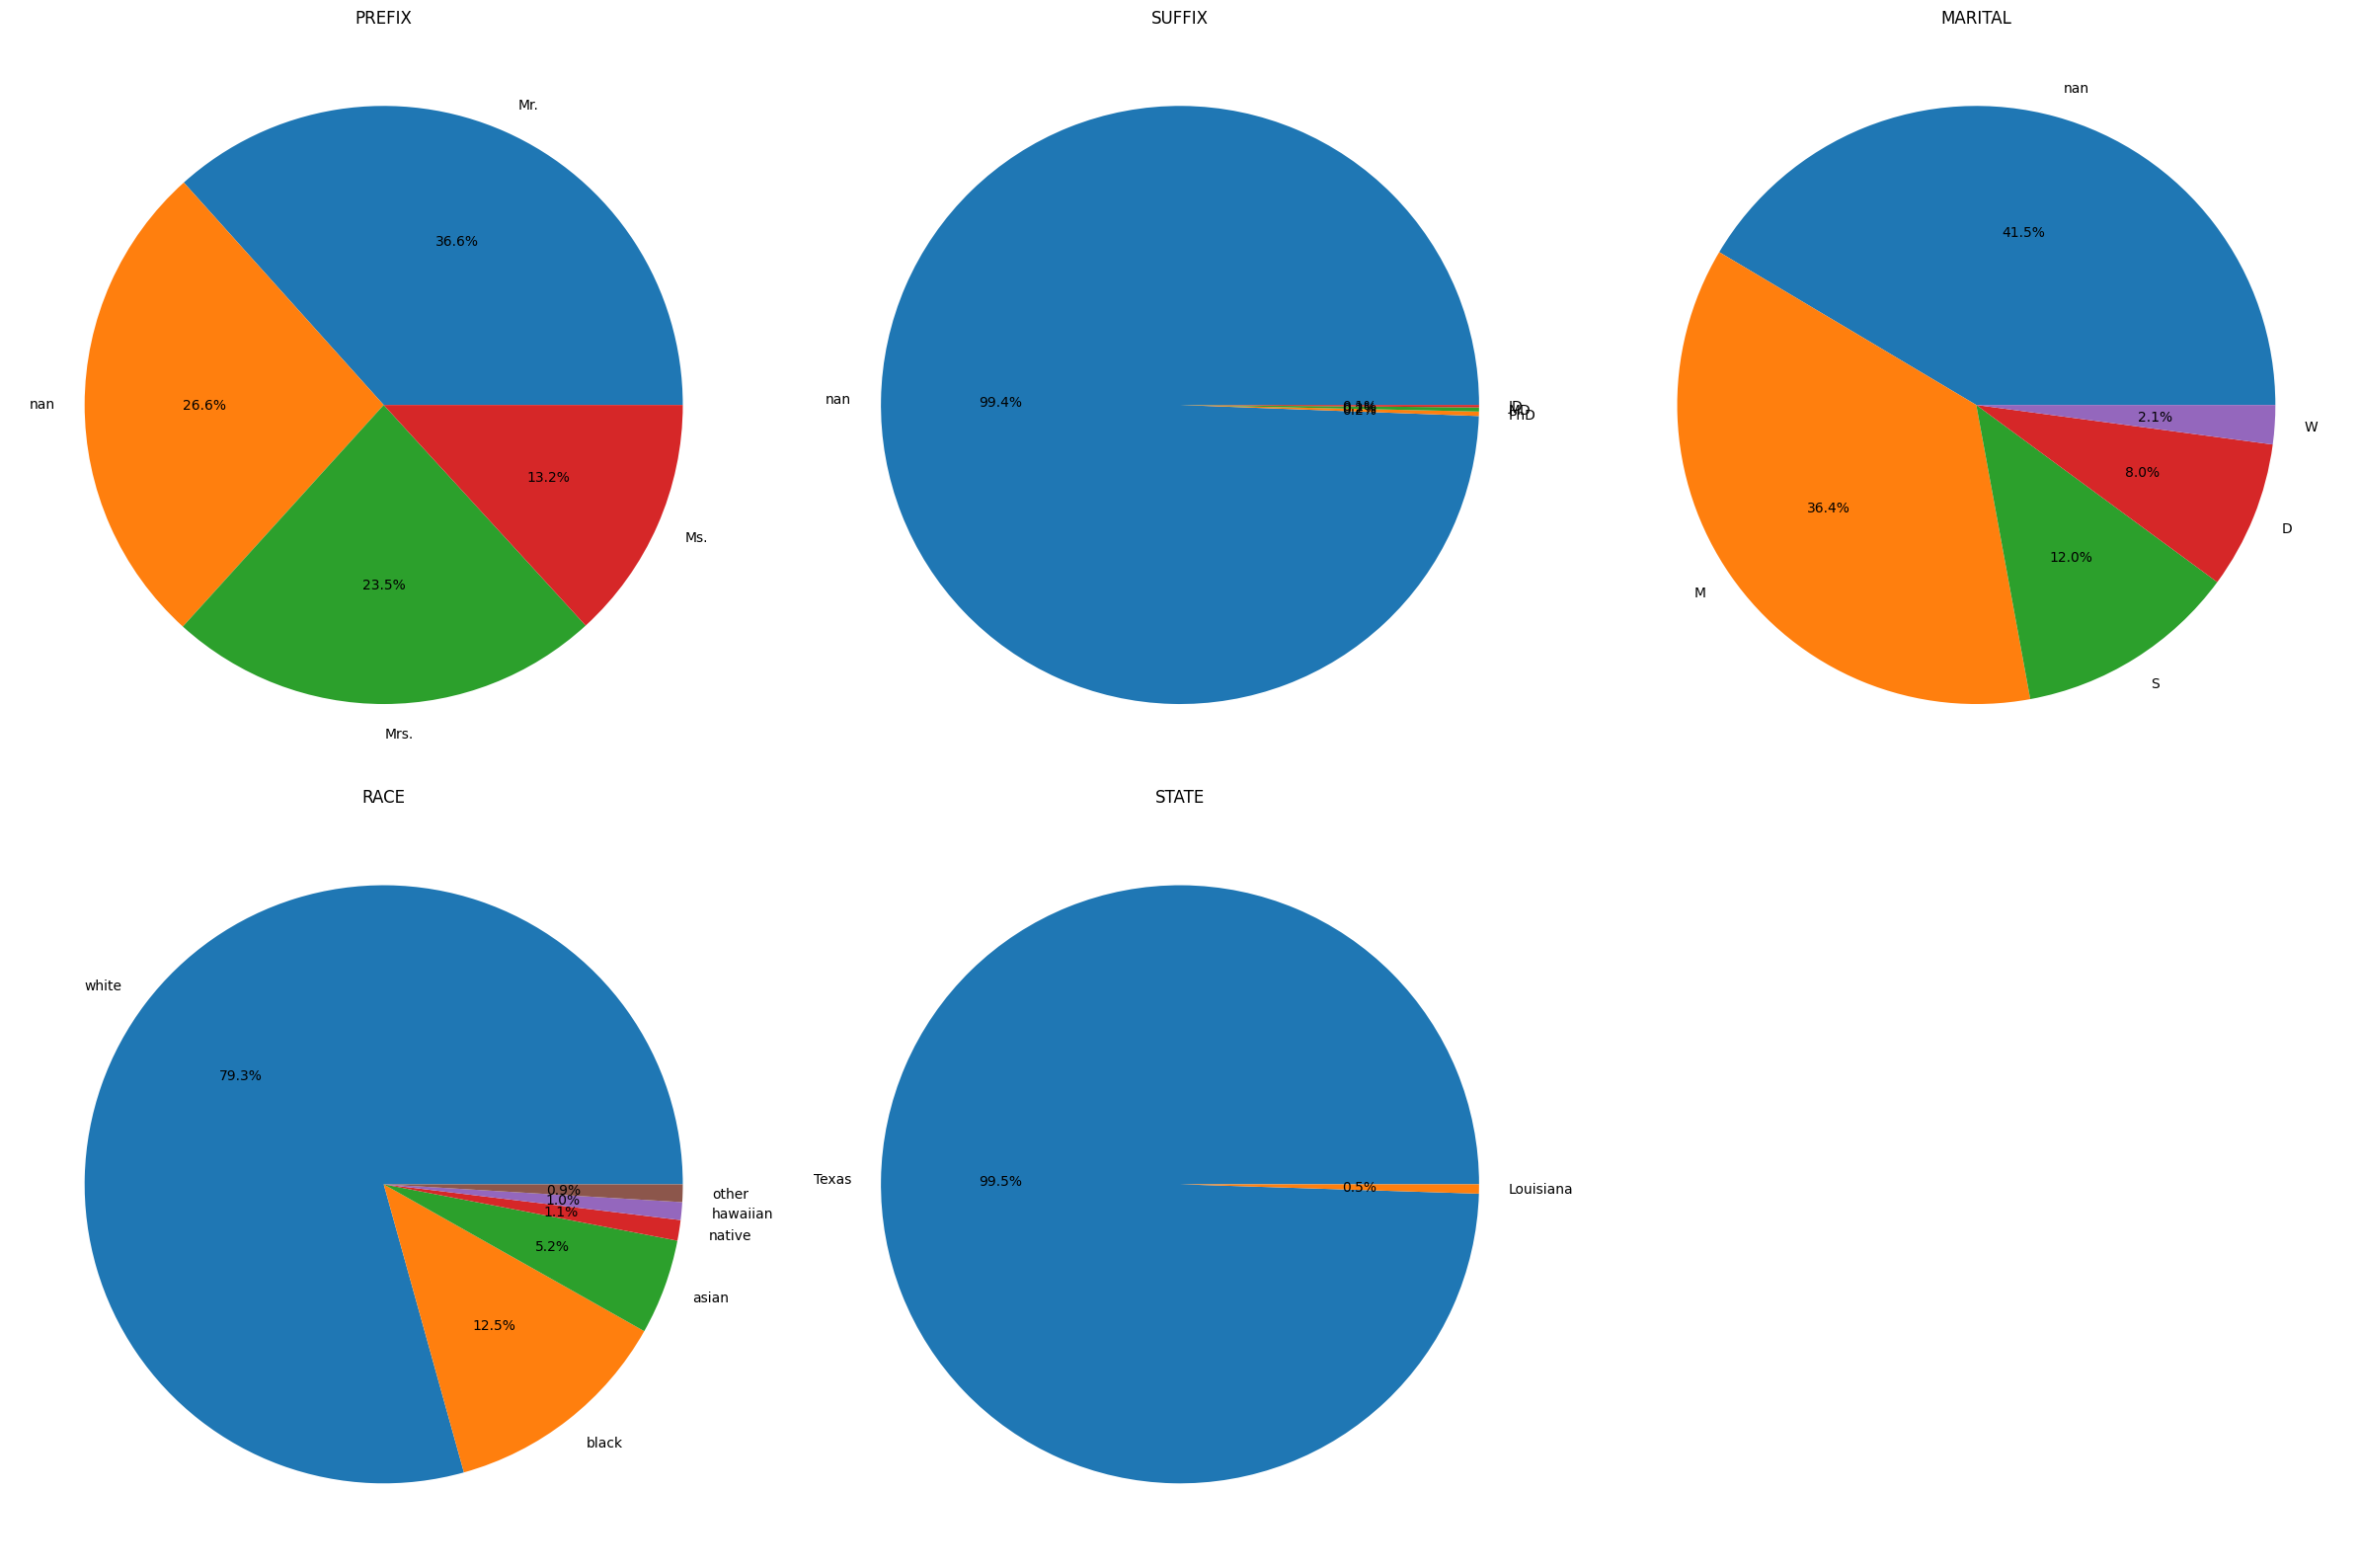

In [41]:
plot_pie_charts(patient,["PREFIX","SUFFIX","MARITAL","RACE","STATE"])


In [42]:
patient.iloc[1]

PATIENT_ID             92675303-ca5b-136a-169b-e764c5753f06
BIRTHDATE                                        1997-04-16
DEATHDATE                                               NaN
SSN                                             999-62-9859
DRIVERS                                           S99999770
PASSPORT                                         X75016560X
PREFIX                                                  Mr.
FIRST                                            Lorenzo669
LAST                                             Urrutia540
SUFFIX                                                  NaN
MAIDEN                                                  NaN
MARITAL                                                 NaN
RACE                                                  white
ETHNICITY                                          hispanic
GENDER                                                  NaN
BIRTHPLACE                        Carolina  Puerto Rico  PR
ADDRESS                       386 Altenw

## Observations:
* 80% of Paitients are White in that 65.39% have the Lupus.
* 51.8% of White have Lupus


## Mapping of diffrent coloum for the TUVA Input Layer
  * input_Layer_name : column , Type
  * patient_id : PATIENT_ID , varchar
  * first_name : FIRST : vrachar
  * last_name : LAST , varchar
  * sex : GENDER ,  varchar
  * race : RACE , varchar
  * birth_date : BIRTHDATE , date
  * death_date : DEATHDATE , date
  * death_flag : if death_date is Null set it as False , boolean
  * address : ADDRESS , varchar
  * city : CITY , varchar
  * state : STATE , varchar
  * zip_code : ZIP , varchar
  * conty : COUNTY , varchar
  * latitude : LAT , float
  * longitude : LON , float
  * data_source : missing . varchar


#**Missing Columns and Mapping Strategies:**

Here's a breakdown of the missing columns in each dataset and potential mapping strategies:

**1. condition.csv:**

- Missing columns: `condition_id`, `recorded_date`, `status`, `condition_type`, `source_code_type`, `normalize_code`, `normalized_description`, `condition_rank`, `present_on_admit_code`, `present_on_admit_description`, `data_source`

- Mapping strategies:
    - `condition_id`: You might need to create a unique identifier for each condition based on existing columns (e.g., `PATIENT`, `ENCOUNTER`, `CODE`).
    - `recorded_date`: Consider using `START` as an approximation or leave it missing if the exact recording date isn't available.
    - `status`: If there's no relevant column, leave it missing or create a placeholder value (e.g., "Unknown").
    - `condition_type`, `source_code_type`, `normalize_code`, `normalized_description`: These might require additional data sources or domain knowledge to populate.
    - `condition_rank`: Leave missing if no ranking information exists.
    - `present_on_admit_code`, `present_on_admit_description`: Not present in `condition.csv`, so leave them missing or populate with placeholders if relevant data is available elsewhere.
    - `data_source`: Consider adding a constant value indicating the source of the `condition.csv` data.

**2. encounter.csv:**

- Missing columns: `claim_id`, `data_source`

- Mapping strategies:
    - `claim_id`: Leave missing if not applicable or use a placeholder if a general claim ID is needed.
    - `data_source`: Consider adding a constant value indicating the source of the `encounter.csv` data.

**3. medication.csv:**

- Missing columns: `medication_id`, `source_code_type`, `source_code`, `source_description`, `ndc_code`, `ndc_description`, `atc_code`, `atc_description`, `route`, `strength`, `quantity`, `quantity_unit`, `practitioner_id`, `data_source`

- Mapping strategies:
    - `medication_id`: You might need to create a unique identifier for each medication record.
    - `source_code_type`, `source_code`, `source_description`: These might require additional data sources or domain knowledge to populate.
    - `ndc_code`, `ndc_description`: Leave missing if not available, but consider obtaining this information if possible.
    - `atc_code`, `atc_description`: Leave missing if not available, but consider obtaining this information if possible.
    - `route`, `strength`: You might be able to extract these from the `DESCRIPTION` column using regular expressions or text processing techniques.
    - `quantity`, `quantity_unit`: Leave missing if not available, but consider obtaining this information if possible.
    - `practitioner_id`: Leave missing if not available.
    - `data_source`: Consider adding a constant value indicating the source of the `medication.csv` data.

**4. symptoms.csv:**

- Missing columns: `observation_id`, `encounter_id`, `panel_id`, `observation_date`, `observation_type`, `source_code_type`, `source_code`, `source_description`, `normalized_code_type`, `normalized_code`, `normalized_description`, `result`, `source_units`, `normalized_units`, `source_reference_range_low`, `source_reference_range_high`, `normalized_reference_range_low`, `normalized_reference_range_high`, `data_source`

- Mapping strategies:
    - `observation_id`: You might need to create a unique identifier for each symptom record.
    - `encounter_id`: Leave missing if not directly available, but consider linking to encounters if possible.
    - `panel_id`, `observation_type`, `source_code_type`, `source_code`, `source_description`, `normalized_code_type`, `normalized_code`, `normalized_description`, `result`, `source_units`, `normalized_units`, `source_reference_range_low`, `source_reference_range_high`, `normalized_reference_range_low`, `normalized_reference_range_high`: These require additional data sources or domain knowledge to populate


#Final Observation

Based on the information provided in `condition.csv` ,  `medication.csv` , `encounter.parquet` , `symptoms.csv` , `patients.csv` &  `sex.csv`, here's a potential approach to merging datasets and finding values for missing columns in the Tuva project input layer mapping:

**Merging Datasets:**

1. **`condition.csv` and `encounter.csv`**: These datasets could potentially be merged based on the `PATIENT` and `ENCOUNTER` columns, assuming they represent the same patient and encounter across both datasets. This might help fill in missing information like `encounter_id` in `condition.csv` (if it's not already present).

2. **`medication.csv` and `encounter.csv`**: Similar to condition and encounter, you might be able to merge these based on `PATIENT` and `ENCOUNTER` to potentially fill in `encounter_id` for medication records.

**Finding Missing Column Values:**

While merging datasets can help with some missing values, it won't solve all of them. Here's a breakdown of some possibilities for specific columns:

- **`recorded_date` (condition.csv):** As mentioned earlier, you might not be able to find an exact recorded date. You could consider using `START` as an approximation or creating a new column with a constant value indicating the approximate data collection period.

- **`claim_id` (encounter.csv):** If claim IDs are not relevant or unavailable, leave it missing. However, if you have another dataset with claim information linked to encounters, you might be able to merge and fill it in.

- **`source_code_type`, `source_code`, `source_description` (condition.csv, medication.csv):** These likely require additional data sources or domain knowledge about how medication and condition codes are defined in your system. You might need to consult documentation or experts to obtain these values.

- **`ndc_code`, `ndc_description`, `atc_code`, `atc_description` (medication.csv):** Similar to the previous point, these might require additional sources or domain knowledge about medication coding systems. Consider obtaining this information if possible, as it can be valuable.

- **`route`, `strength` (medication.csv):** You might be able to extract these from the `DESCRIPTION` column in `medication.csv` using regular expressions or text processing techniques. This might involve domain knowledge about how medication descriptions are formatted in your system.

- **`observation_id`, `encounter_id`, `panel_id`, `observation_type` etc. (symptoms.csv):** These columns are likely missing because `symptoms.csv` doesn't directly capture clinical observations in the same format as Tuva expects. You might need additional datasets or information about how symptoms are recorded in your system to populate these.



# Functions to do while creating the data Pipeline
## **`condition`** Dataframe processing tasks:
- **`PATIENT` , `ENCOUNTER` & `DESCRIPTION`** must be converted into lower case in `condition` Dataframe.
- **`START` & `STOP`** must be converted into date type.
-set **`recorded_date`** as **``START``**.
- `condition_id`: To create a unique identifier for each condition based on existing columns (e.g., `PATIENT`, `ENCOUNTER`, `CODE`).
- `status`: if `STOP` date is given set it as `resolved` else `ongoing`.

- `condition_type`, `source_code_type`, `normalize_code`, `normalized_description`: These might require additional data sources or domain knowledge to populate so put a placeholder `unknown`.
- `condition_rank`: Leave missing if no ranking information exists `unknown`.
- `present_on_admit_code`, `present_on_admit_description`: Not present in `condition.csv`, so leave them missing or populate with placeholders if relevant data is available elsewhere `unknown`.
- `data_source`: Consider adding a constant value indicating the source of the `condition.csv` data `unknown`.


## **`encounter`** Dataframe processing tasks:
- **`PATIENT` , `ID` & `ORGANIZATION` , `PROVIDER` , `PAYER` & `DESCRIPTION`** must be converted into lower case in `condition` Dataframe.
- `claim_id`: genrate a unique id using the `ID` & `PATIENT`.
- `admit_source_code` & `admit_source_description` can be assinged the value from following link : https://github.com/tuva-health/tuva/blob/main/seeds/terminology/terminology__admit_source.csv

- `admit_type_code` & `admit_type_description` can be mappd to the values from : https://github.com/tuva-health/tuva/blob/main/seeds/terminology/terminology__admit_type.csv
-`discharge_disposition_code` & `discharge_disposition_description` can be filled to the value from the following link : https://github.com/tuva-health/tuva/blob/main/seeds/terminology/terminology__discharge_disposition.csv


## `medication` Dataframe processing task
- **`PATIENT` , `ENCOUNTER` & `DESCRIPTION`, `rxnorm_description`, `REASONDESCRIPTION`** must be converted into lower case in `medication` Dataframe.
- `medication_id`: can be set as ENCOUNTER
-`source_code` & `source_description` can be get by looking for the `source_code` & `source_description` in the `symptoms Dataframe` by using the `encounter_id`.
- `route` & `strength` can be get via using the REGEX on the `DESCRIPTION`
- `days_supply` can be filled using the STOP-START


## `obsevartion` DataFrame processing Task:
- **`PATIENT` , `PATHOLOGY` & `SYMPTOMS``** must be converted into lower case in `observation` Dataframe.
- `source_code_type` , `source_code` , `source_code_description` can be obtained by using the `PATHOLOGY` from the `condition` data frame.
- `result` can be filled using `PATHOLOGY`.
- `observation_id` generate unique value for it as there are paitinets getting reapeted.

## `PATIENT` DataFrame Processing Task:
- **`PATIENT_ID` , `FIRST` , `LAST`, `RACE`, `address` `CITY` , `STATE`, `COUNTY`** must be converted into lower case



##Additional Question
1. How many distinct patients are in the dataset?
2. Plot the distinct medications over time using a python plotting library. If you notice any duplicates, go back to your data cleaning section to fix.
3. Create a piechart indicating the percentage of patients across each racial category and gender.
4. What percentage of patients have all 4 symptom categories ≥ 30?

In [103]:
pc = pd.read_csv('preprocessed_conditions.csv')
pe = pd.read_csv('preprocessed_encounters.csv')
pm = pd.read_csv('preprocessed_medication.csv')
po = pd.read_csv('preprocessed_observations.csv')
pp = pd.read_csv('preprocessed_patients.csv')

In [136]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Auto-adjust width to display dataframe without truncation
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Remove scientific notation

# Your dataframe operations here


In [157]:

def drop_columnName(column_name):
    drop_column = [x for x in column_name if '_y' in x]
    new_name = {x:x.split('_')[0] for x in column_name if '_x' in x}

    return drop_column, new_name

In [162]:
df1 = pp.merge(pe,on=['patient_id'],how='left')
drop , new = drop_columnName(df1.columns)
df1 = df1.drop(drop,axis=1)
df1 = df1.rename(columns=new)

In [164]:
df1 = df1.merge(pc,on=['patient_id'],how='left')
drop , new = drop_columnName(df1.columns)
df1 = df1.drop(drop,axis=1)
df1 = df1.rename(columns=new)

In [165]:
df1 = df1.merge(po,on=['patient_id'],how='left')
drop , new = drop_columnName(df1.columns)
df1 = df1.drop(drop,axis=1)
df1 = df1.rename(columns=new)

In [166]:
df1 = df1.merge(pm,on=['patient_id'],how='left')
drop , new = drop_columnName(df1.columns)
df1 = df1.drop(drop,axis=1)
df1 = df1.rename(columns=new)

In [168]:
df2 = df1[['patient_id','race','num_symptoms',]]

* How many distinct patients are in the dataset?

In [170]:
print(f"Unique Patients in the dataset:{df2['patient_id'].nunique()}")

Unique Patients in the dataset:10000


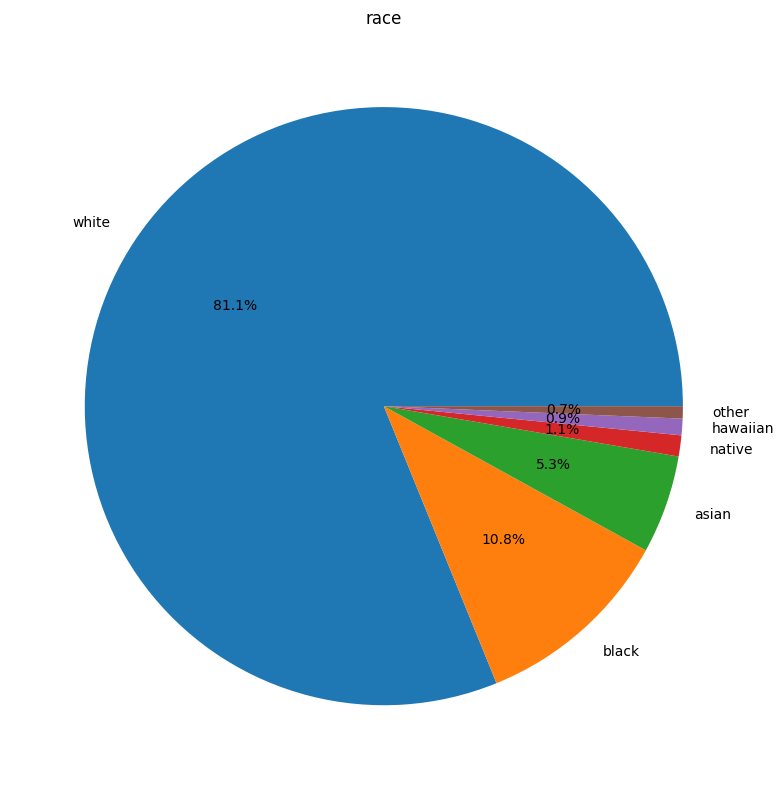

In [173]:
plot_pie_charts(df2, ['race'])

In [175]:
# 4. What percentage of patients have all 4 symptom categories ≥ 30?
print(f"{(len(df2[df2['num_symptoms']==4])/len(df2))*100}% have all 4 symptoms & its not greater than 30%")

26.833601917276145% have all 4 symptoms & its not greater than 30%
